## Case Study $1$ : penalized regressions & overfitting issue

### linear regression with only $1-d$ variable

In [62]:
import pickle
import matplotlib.pylab as plt
import numpy as np

data = pickle.load( open("/Users/xm/Documents/Xinpei's Code/MachineLearning/HW2/lasso/code/lasso_data.pickle", "rb" ) )
x_test = data['x_test']
x_train = data['x_train']
y_test = data['y_test']
y_train = data['y_train']
# train 100 samples and testing 900 samples
print(len(x_train), len(x_test))

100 900


In [63]:
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val  

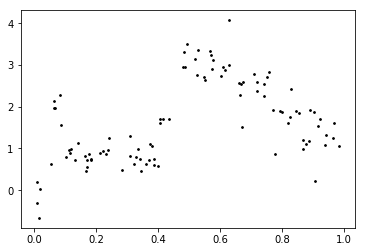

In [64]:
plt.scatter(x_train, y_train, s=3, color='k', label='Training data')

In [65]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[i] for i in x_train], y_train)
predict = reg.predict([[i] for i in x_test])
print(rmse(predict, y_test))

0.8328654955386372


### 2) generate features based on simple linear functions
Method:
define n linear small internals, 
if x[x >= upper_bound] = 1, otherwise, 0

In [66]:
# 1d - 400d
# sparse linear combination of our features
import pandas as pd
train_ = pd.read_csv("/Users/xm/Documents/Xinpei's Code/Meeting/regression/reg_feature_train.csv")
feature_names = ["feature" + str(i) for i in range(1, 401)]
x_train_fea = train_[feature_names]

In [67]:
test_ = pd.read_csv("/Users/xm/Documents/Xinpei's Code/Meeting/regression/reg_feature_test.csv")
x_test_fea = test_[feature_names]

#### Basic Linear Models v.s. DataRobot

In [68]:
# regular regression
reg = linear_model.LinearRegression()
reg.fit(x_train_fea, y_train)
predict = reg.predict(x_test_fea)
print(rmse(predict, y_test))

826647838.6072543


In [73]:
# default ridge (without any of parameter tunning)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_fea, y_train) 
predict_train1 = ridge.predict(x_train_fea)
print(rmse(predict_train1, y_train))
predict1 = ridge.predict(x_test_fea)
print(rmse(predict1, y_test))

0.1810244329276658
0.37667843018044794


In [74]:
# lasso (without any of parameter tunning)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train_fea, y_train) 
predict_train2 = ridge.predict(x_train_fea)
print(rmse(predict_train2, y_train))
predict2 = lasso.predict(x_test_fea)
print(rmse(predict2, y_test))

0.1810244329276658
0.626171627111302


In [71]:
# datarobot best results among 35 models
dr_df = pd.read_csv("/Users/xm/Documents/Xinpei's Code/Meeting/regression/DR_predict.csv")
predict3 = dr_df["Prediction"]
print(rmse(predict3, y_test))

0.5762918191232448


#### Comments: DataRobot overfit the data?
#### Questions: 
#### 1. how to get penalized regression's coefficients in order to known which variables are penalized to zero to values close to zero.

#### 2. how to set parameter $p$
$J(w;\lambda)=\frac{1}{n}\sum_{i=1}^{n}\left(w^{T}x_{i}-y_{i}\right)^{2}+\lambda\|w\|^{p}.$